In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
import seaborn as sns

In [ ]:
import zipfile
import os
import requests

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip"
file_name = "AirQualityUCI.zip"

if not os.path.exists(file_name):
    response = requests.get(url)
    with open(file_name, 'wb') as zip_file:
        zip_file.write(response.content)

# Extract the zip file
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

# Find the Excel file in the extracted folder
excel_files = [file for file in os.listdir() if file.endswith(".xls") or file.endswith(".xlsx")]

In [ ]:
if not excel_files:
    print("No Excel file found in the extracted folder.")
else:
    # Use the first Excel file in the list
    excel_file = excel_files[0]

    # Load the Excel file into a DataFrame
    df = pd.read_excel(excel_file, decimal=',', na_values=-200)

    print(df.head())
    df.info()

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

1. Data Preprocessing

<Axes: >

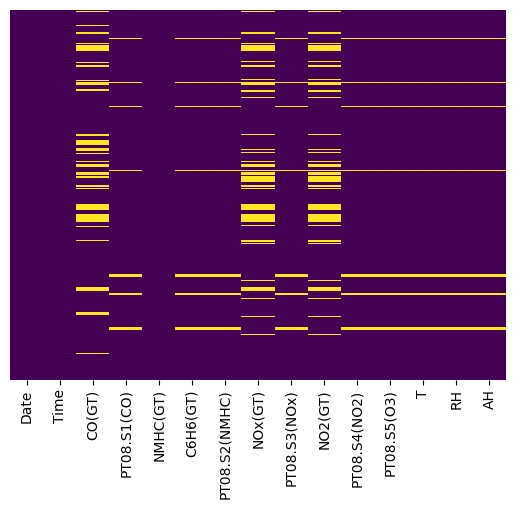

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
df.Date.isnull().values.any()

False

In [ ]:
df.shape

(9357, 15)

In [ ]:
print(df['NMHC(GT)']=='-200')

0       False
1       False
2       False
3       False
4       False
        ...  
9352    False
9353    False
9354    False
9355    False
9356    False
Name: NMHC(GT), Length: 9357, dtype: bool


In [ ]:
# NMHC(GT) column is missing many values so deleting this column from the dataset
#is very less likely to be of any significant importance in the dataset
df.drop(['NMHC(GT)'], axis=1, inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['DateTime'] = df['Date']+pd.to_timedelta(df['Time'].astype(str))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
 14  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2),

In [ ]:
#df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
 14  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2),

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df["T"] = df.groupby("Date")["T"].transform(lambda x: x.fillna(x.mean()))
df["CO(GT)"] = df.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NOx(GT)"] = df.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NO2(GT)"] = df.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df['T'].value_counts(dropna= False)
df['CO(GT)'].value_counts(dropna= False)
df['NOx(GT)'].value_counts(dropna= False)
df['NO2(GT)'].value_counts(dropna= False)

NaN      816
101.0    111
97.0      69
95.0      66
114.0     63
        ... 
230.4      1
207.3      1
216.4      1
197.5      1
167.7      1
Name: NO2(GT), Length: 1720, dtype: int64

<Axes: >

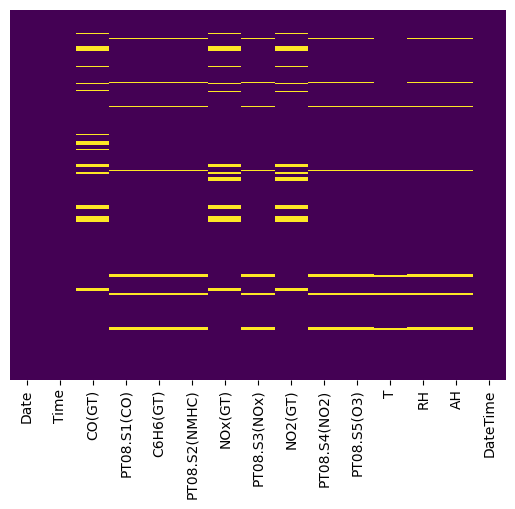

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         8493 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        8541 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        8541 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              9165 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
 14  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2),

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,2005-04-04 10:00:00
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,2005-04-04 11:00:00
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,2005-04-04 12:00:00
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,2005-04-04 13:00:00


In [ ]:
df.shape

(9357, 15)

In [ ]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [ ]:
df.fillna(method='ffill', inplace= True)

In [ ]:
df.isnull().any().any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
 14  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2),

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
timestamp_columns = ['Date', 'Time']
df[timestamp_columns] = df[timestamp_columns].astype(str)

In [ ]:
numeric_columns = df.select_dtypes(include=['float64']).columns
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])

non_numeric_columns = df.select_dtypes(exclude=['float64']).columns
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
df[non_numeric_columns] = imputer_non_numeric.fit_transform(df[non_numeric_columns])

In [ ]:
# Convert timestamp columns back to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [ ]:
correlation_matrix_numeric = df[numeric_columns].corr
correlation_matrix_non_numeric = df[non_numeric_columns].corr()

<ipython-input-176-5721c3b24085>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_non_numeric = df[non_numeric_columns].corr()


In [ ]:
def iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [ ]:
df_no_outliers =iqr(df[numeric_columns], 'RH')

In [ ]:
df_no_outliers

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


2. Splitting the dataset


In [ ]:
x = df_no_outliers.drop("RH", axis=1)  # Features
y = df_no_outliers["RH"]  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

3. Training a linear regression model

In [ ]:
x_train_np = np.c_[np.ones((x_train.shape[0], 1)), x_train]  # Add a bias term
theta = np.linalg.inv(x_train_np.T @ x_train_np) @ x_train_np.T @ y_train.values

In [ ]:
model_sklearn = LinearRegression()
model_sklearn.fit(x_train, y_train)


LinearRegression()

4. R2 score and mean squared error


In [ ]:
x_test_np = np.c_[np.ones((x_test.shape[0], 1)), x_test]
y_pred_np = x_test_np @ theta

y_pred_sklearn = model_sklearn.predict(x_test)

In [ ]:
r2_np = r2_score(y_test, y_pred_np)
mse_np = mean_squared_error(y_test, y_pred_np)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print("Results for the model from scratch:")
print(f"R-squared: {r2_np}")
print(f"Mean Squared Error: {mse_np}")

print("\nResults for the sklearn model:")
print(f"R-squared: {r2_sklearn}")
print(f"Mean Squared Error: {mse_sklearn}")

Results for the model from scratch:
R-squared: 0.8628532859239165
Mean Squared Error: 41.4088274681493

Results for the sklearn model:
R-squared: 0.8628532859239081
Mean Squared Error: 41.40882746815184


Due to both models overlap each other and the number of points is a lot so points due to other model are not visible


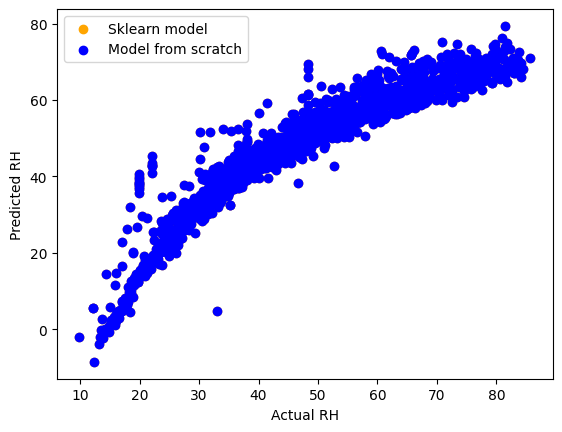

In [ ]:
plt.scatter(y_test, y_pred_sklearn, label='Sklearn model', color='orange')
plt.scatter(y_test, y_pred_np, label='Model from scratch', color='blue')
plt.xlabel('Actual RH')
plt.ylabel('Predicted RH')
plt.legend()
plt.show()

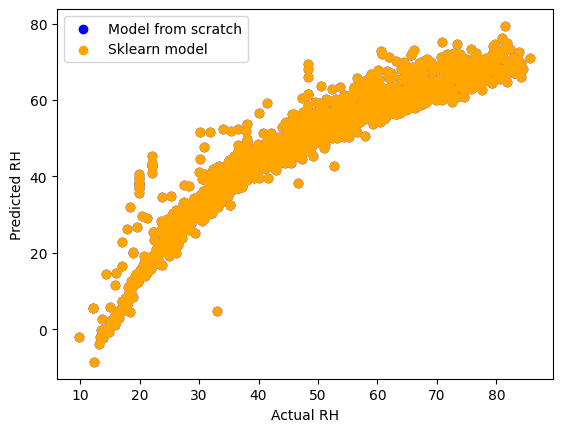

In [ ]:
plt.scatter(y_test, y_pred_np, label='Model from scratch', color='blue')
plt.scatter(y_test, y_pred_sklearn, label='Sklearn model', color='orange')
plt.xlabel('Actual RH')
plt.ylabel('Predicted RH')
plt.legend()
plt.show()